<a href="https://colab.research.google.com/github/mutimrd2n/Analisisentimentwitter-/blob/main/NB_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Tweets.csv to Tweets.csv


Jumlah data: 14640
Label sentimen unik: ['neutral' 'positive' 'negative']

===== EVALUASI MODEL =====
Akurasi: 77.25%

Confusion Matrix:
 [[1757   87   45]
 [ 303  230   47]
 [ 146   38  275]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1889
     neutral       0.65      0.40      0.49       580
    positive       0.75      0.60      0.67       459

    accuracy                           0.77      2928
   macro avg       0.73      0.64      0.67      2928
weighted avg       0.76      0.77      0.76      2928



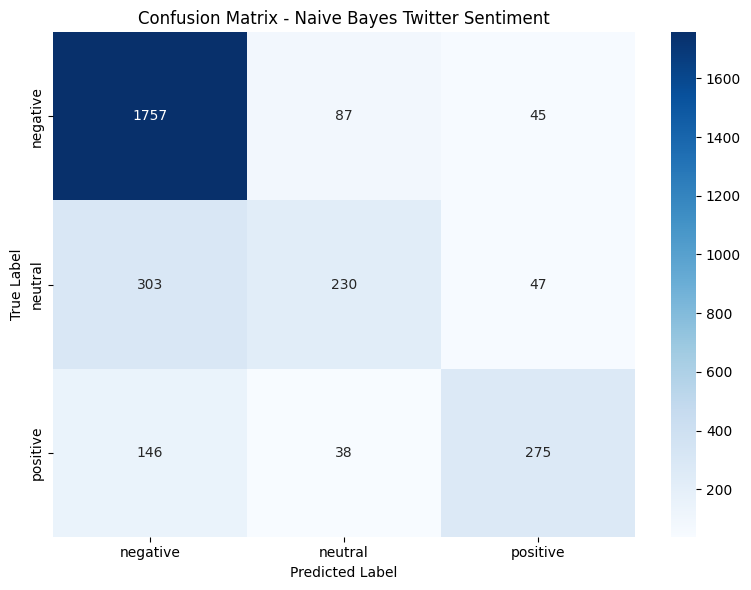

In [2]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load dataset
df = pd.read_csv("Tweets.csv")
print("Jumlah data:", len(df))
print("Label sentimen unik:", df['airline_sentiment'].unique())

# 2. Ambil kolom teks & label
X_raw = df['text']
y = df['airline_sentiment']

# 3. Text cleaning (basic preprocessing)
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # hapus URL
    text = re.sub(r"@\w+", "", text)     # hapus mention
    text = re.sub(r"#\w+", "", text)     # hapus hashtag
    text = re.sub(r"[^\w\s]", "", text)  # hapus tanda baca
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text.strip()

X_clean = X_raw.apply(clean_text)

# 4. Ubah teks ke fitur numerik (CountVectorizer)
vectorizer = CountVectorizer(stop_words="english")
X_vec = vectorizer.fit_transform(X_clean)

# 5. Split data (train/test 80:20)
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# 6. Training model Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# 7. Prediksi dan evaluasi
y_pred = model.predict(X_test)

print("\n===== EVALUASI MODEL =====")
print("Akurasi: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 8. Visualize Confusion Matrix
labels = model.classes_
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naive Bayes Twitter Sentiment")
plt.tight_layout()
plt.savefig("confusion_matrix.png")
plt.show()